In [55]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
linreg = LinearRegression()

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix

In [56]:
train = pd.read_csv('train.csv')
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Q1

In [57]:
sp = pd.DataFrame(train['SalePrice'])
ca = pd.DataFrame(train['CentralAir'])

In [68]:
sp_train, sp_test, ca_train, ca_test = train_test_split(sp, ca, test_size = 0.25)
print("Train Set :", ca_train.shape, sp_train.shape)
print("Test Set  :", ca_test.shape, sp_test.shape)

Train Set : (1095, 1) (1095, 1)
Test Set  : (365, 1) (365, 1)


Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9406392694063926

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.9452054794520548



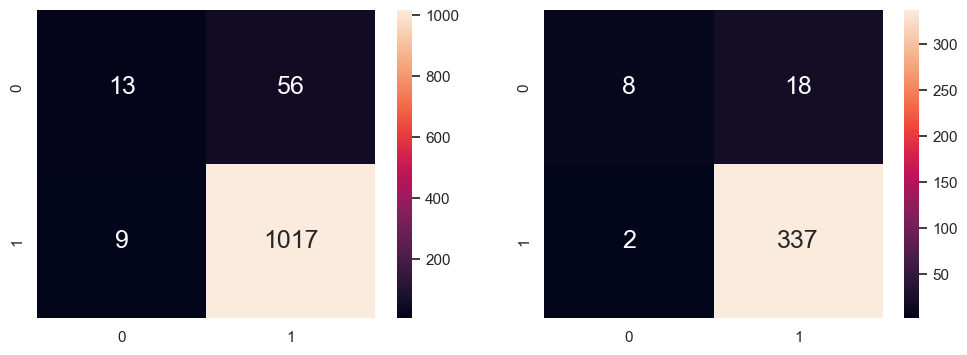

In [69]:
# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 2)  # create the decision tree object
dectree.fit(sp_train, ca_train)                    # train the decision tree model

# Predict Legendary values corresponding to Total
ca_train_pred = dectree.predict(sp_train)
ca_test_pred = dectree.predict(sp_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(sp_train, ca_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(sp_test, ca_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(ca_train, ca_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(ca_test, ca_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])
plt.show()

Train set:
Classification Accuracy:0.94064(5sf), 
TPR:0.99123(5sf), 
FPR:0.81159(5sf)

Test set:
Classification Accuracy:0.94521(5sf), 
TPR:0.99410(5sf), 
FPR:0.69231(5sf)

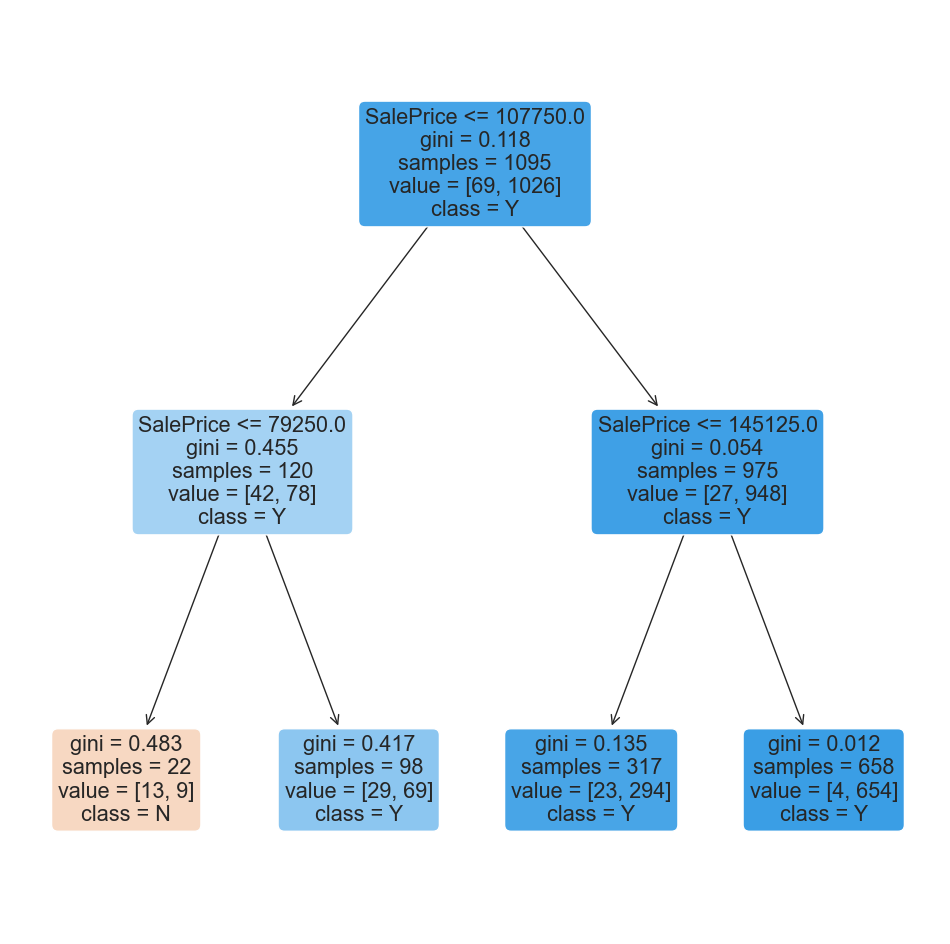

In [70]:
f = plt.figure(figsize=(12,12))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=["SalePrice"], 
          class_names=["N","Y"])
plt.show()

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.94337899543379

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.9397260273972603



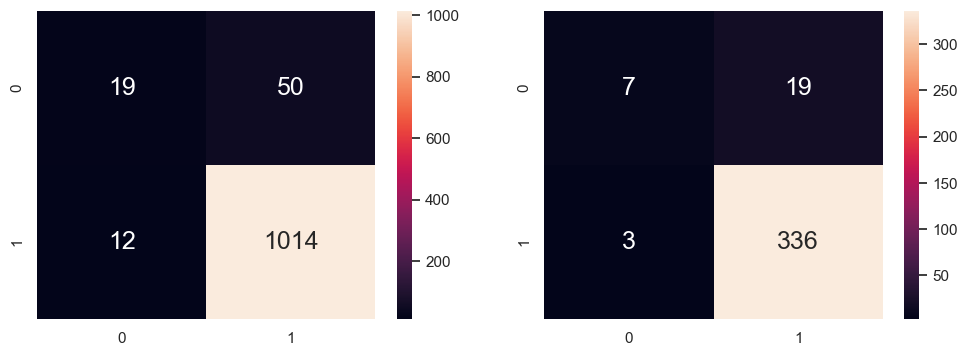

In [71]:
# Decision Tree using Train Data
dectree1 = DecisionTreeClassifier(max_depth = 4)  # create the decision tree object
dectree1.fit(sp_train, ca_train)                    # train the decision tree model

# Predict Legendary values corresponding to Total
ca_train_pred1 = dectree1.predict(sp_train)
ca_test_pred1 = dectree1.predict(sp_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree1.score(sp_train, ca_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree1.score(sp_test, ca_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(ca_train, ca_train_pred1),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(ca_test, ca_test_pred1), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])
plt.show()

Train set:
Classification Accuracy:0.94338(5sf), 
TPR:0.98830(5sf), 
FPR:0.72464(5sf)

Test set:
Classification Accuracy:0.93973(5sf), 
TPR:0.99115(5sf), 
FPR:0.73077(5sf)

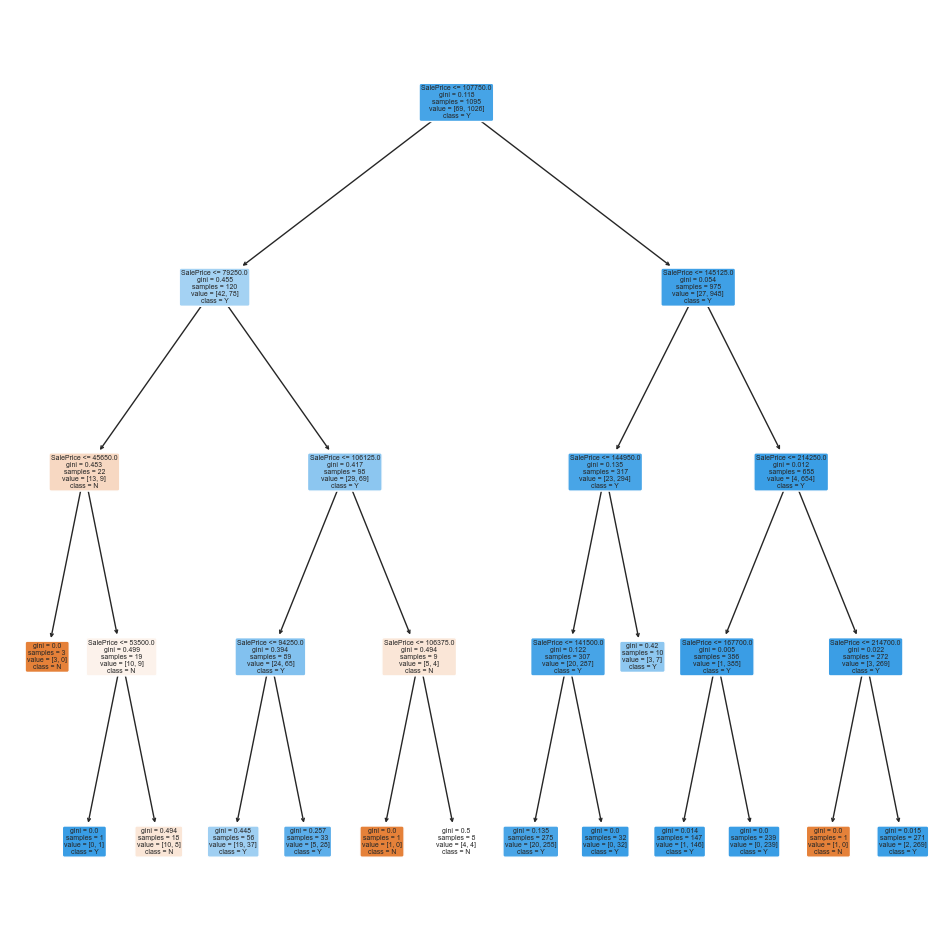

In [72]:
f = plt.figure(figsize=(12,12))
plot_tree(dectree1, filled=True, rounded=True, 
          feature_names=["SalePrice"], 
          class_names=["N","Y"])
plt.show()

The model with max depth = 2 is better as it has a higher classification accuracy.

# Q2

In [73]:
oq = pd.DataFrame(train['OverallQual'])

yb = pd.DataFrame(train['YearBuilt'])

Train Set : (1095, 1) (1095, 1)
Test Set  : (365, 1) (365, 1)
Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9442922374429223

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.9260273972602739



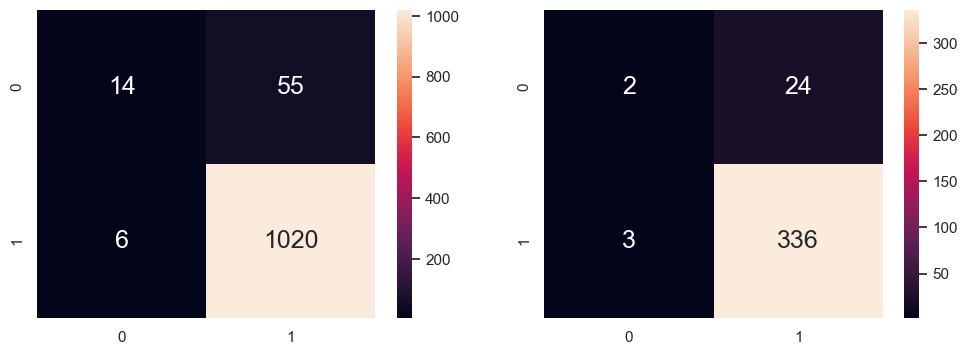

In [74]:
oq_train, oq_test, ca_train, ca_test = train_test_split(oq, ca, test_size = 0.25)
print("Train Set :", ca_train.shape, oq_train.shape)
print("Test Set  :", ca_test.shape, oq_test.shape)

# Decision Tree using Train Data
dectree2 = DecisionTreeClassifier(max_depth = 4)  # create the decision tree object
dectree2.fit(oq_train, ca_train)                    # train the decision tree model

# Predict Legendary values corresponding to Total
ca_train_pred2 = dectree2.predict(oq_train)
ca_test_pred2 = dectree2.predict(oq_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree2.score(oq_train, ca_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree2.score(oq_test, ca_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(ca_train, ca_train_pred2),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(ca_test, ca_test_pred2), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])
plt.show()

Train set:
Classification Accuracy:0.94429(5sf), 
TPR:0.99415(5sf), 
FPR:0.79710(5sf)

Test set:
Classification Accuracy:0.92603(5sf), 
TPR:0.99115(5sf), 
FPR:0.92308(5sf)

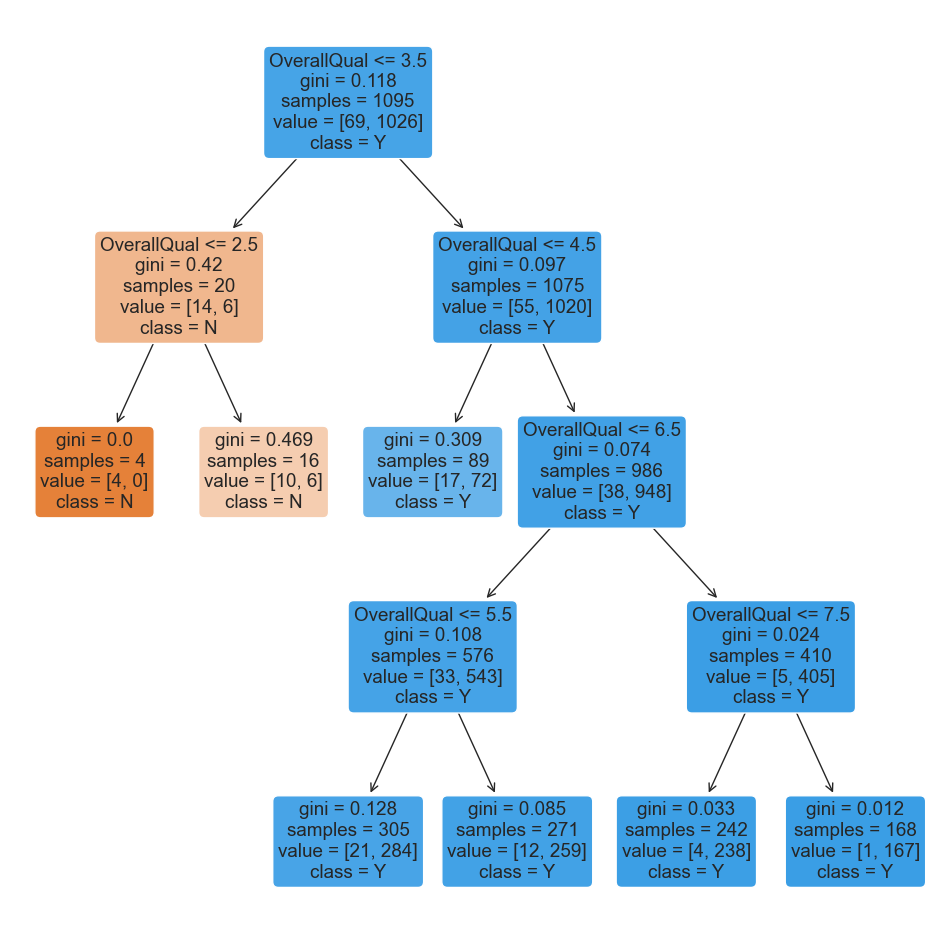

In [75]:
f = plt.figure(figsize=(12,12))
plot_tree(dectree2, filled=True, rounded=True, 
          feature_names=["OverallQual"], 
          class_names=["N","Y"])
plt.show()

Train Set : (1095, 1) (1095, 1)
Test Set  : (365, 1) (365, 1)
Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9397260273972603

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.9205479452054794



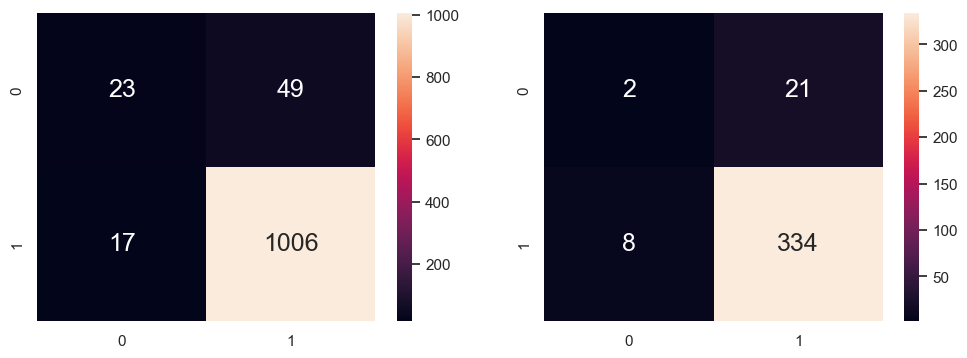

In [76]:
yb_train, yb_test, ca_train, ca_test = train_test_split(yb, ca, test_size = 0.25)
print("Train Set :", ca_train.shape, yb_train.shape)
print("Test Set  :", ca_test.shape, yb_test.shape)

# Decision Tree using Train Data
dectree3 = DecisionTreeClassifier(max_depth = 4)  # create the decision tree object
dectree3.fit(yb_train, ca_train)                    # train the decision tree model

# Predict Legendary values corresponding to Total
ca_train_pred3 = dectree3.predict(yb_train)
ca_test_pred3 = dectree3.predict(yb_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree3.score(yb_train, ca_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree3.score(yb_test, ca_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(ca_train, ca_train_pred3),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(ca_test, ca_test_pred3), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])
plt.show()

Train set:
Classification Accuracy:0.93973(5sf), 
TPR:0.98338(5sf), 
FPR:0.68056(5sf)

Test set:
Classification Accuracy:0.92055(5sf), 
TPR:0.97661(5sf), 
FPR:0.91304(5sf)

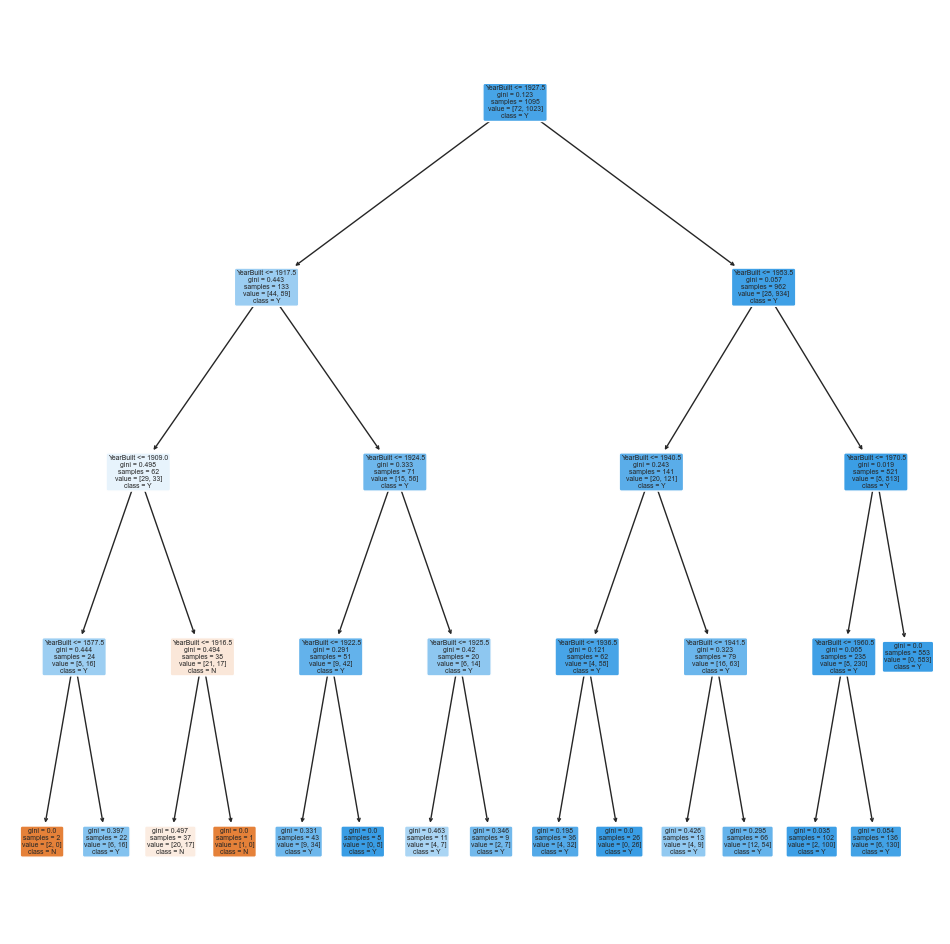

In [77]:
f = plt.figure(figsize=(12,12))
plot_tree(dectree3, filled=True, rounded=True, 
          feature_names=["YearBuilt"], 
          class_names=["N","Y"])
plt.show()

SalePrice is the best variable to predict CentralAir as it has the highest Classifcation Accuracy for test data among the three variables.

# Q3

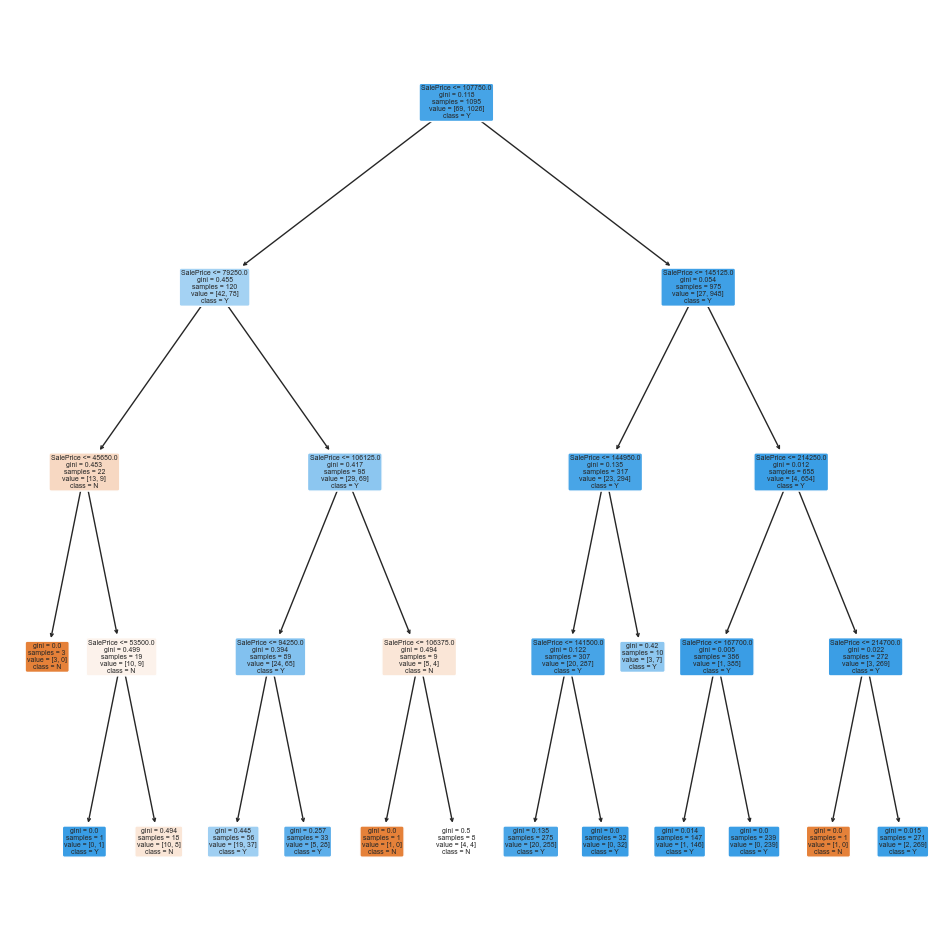

In [78]:
f = plt.figure(figsize=(12,12))
plot_tree(dectree1, filled=True, rounded=True, 
          feature_names=["SalePrice"], 
          class_names=["N","Y"])
plt.show()

The leaf node with the most False Positives is 66750<SalePrice<=97750

In [101]:
sp_range = (sp_train['SalePrice']<=94250) & (sp_train['SalePrice']>79250)

sp_extracted = sp_train[sp_range]
sp_extracted1 = sp_extracted.reset_index()

trainRow = sp_extracted1['index']
a = train.iloc[trainRow]
print(a)

        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1218  1219          50       RM         52.0     6240   Pave   NaN      Reg   
430    431         160       RM         21.0     1680   Pave   NaN      Reg   
1179  1180          20       RL         77.0     8335   Pave   NaN      Reg   
1062  1063         190       RM         85.0    13600   Pave  Grvl      Reg   
632    633          20       RL         85.0    11900   Pave   NaN      Reg   
736    737          90       RL         60.0     8544   Pave   NaN      Reg   
1219  1220         160       RM         21.0     1680   Pave   NaN      Reg   
589    590          40       RM         50.0     9100   Pave   NaN      Reg   
75      76         180       RM         21.0     1596   Pave   NaN      Reg   
307    308          50       RM          NaN     7920   Pave  Grvl      IR1   
88      89          50  C (all)        105.0     8470   Pave   NaN      IR1   
1090  1091          90       RL         60.0     854

In [102]:
a.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56 entries, 1218 to 1453
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             56 non-null     int64  
 1   MSSubClass     56 non-null     int64  
 2   MSZoning       56 non-null     object 
 3   LotFrontage    49 non-null     float64
 4   LotArea        56 non-null     int64  
 5   Street         56 non-null     object 
 6   Alley          4 non-null      object 
 7   LotShape       56 non-null     object 
 8   LandContour    56 non-null     object 
 9   Utilities      56 non-null     object 
 10  LotConfig      56 non-null     object 
 11  LandSlope      56 non-null     object 
 12  Neighborhood   56 non-null     object 
 13  Condition1     56 non-null     object 
 14  Condition2     56 non-null     object 
 15  BldgType       56 non-null     object 
 16  HouseStyle     56 non-null     object 
 17  OverallQual    56 non-null     int64  
 18  Overall

In [103]:
condition = (a['CentralAir']=='N')
a_extracted = a[condition]
print(a_extracted)

        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1218  1219          50       RM         52.0     6240   Pave   NaN      Reg   
1062  1063         190       RM         85.0    13600   Pave  Grvl      Reg   
736    737          90       RL         60.0     8544   Pave   NaN      Reg   
88      89          50  C (all)        105.0     8470   Pave   NaN      IR1   
1090  1091          90       RL         60.0     8544   Pave   NaN      Reg   
438    439          30       RL         40.0     4280   Pave   NaN      Reg   
1137  1138          50       RL         54.0     6342   Pave   NaN      Reg   
39      40          90       RL         65.0     6040   Pave   NaN      Reg   
821    822          20       RM         60.0     6000   Pave  Pave      Reg   
1013  1014          30       RM         60.0     7200   Pave   NaN      Reg   
676    677          70       RM         60.0     9600   Pave  Grvl      Reg   
1412  1413          90       RL         60.0     720